In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/content/HousingData.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [8]:
df.nunique()

,0
CRIM,484
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,348
DIS,412
RAD,9
TAX,66


In [9]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [10]:
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


from matplotlib import pyplot as plt
_df_4['CRIM'].plot(kind='hist', bins=20, title='CRIM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['ZN'].plot(kind='hist', bins=20, title='ZN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['INDUS'].plot(kind='hist', bins=20, title='INDUS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CHAS'].plot(kind='hist', bins=20, title='CHAS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='CRIM', y='ZN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='ZN', y='INDUS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='INDUS', y='CHAS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='CHAS', y='NOX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['CRIM'].plot(kind='line', figsize=(8, 4), title='CRIM')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['ZN'].plot(kind='line', figsize=(8, 4), title='ZN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['INDUS'].plot(kind='line', figsize=(8, 4), title='INDUS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['CHAS'].plot(kind='line', figsize=(8, 4), title='CHAS')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
corr = df.corr()
corr.shape

(14, 14)

<Axes: >

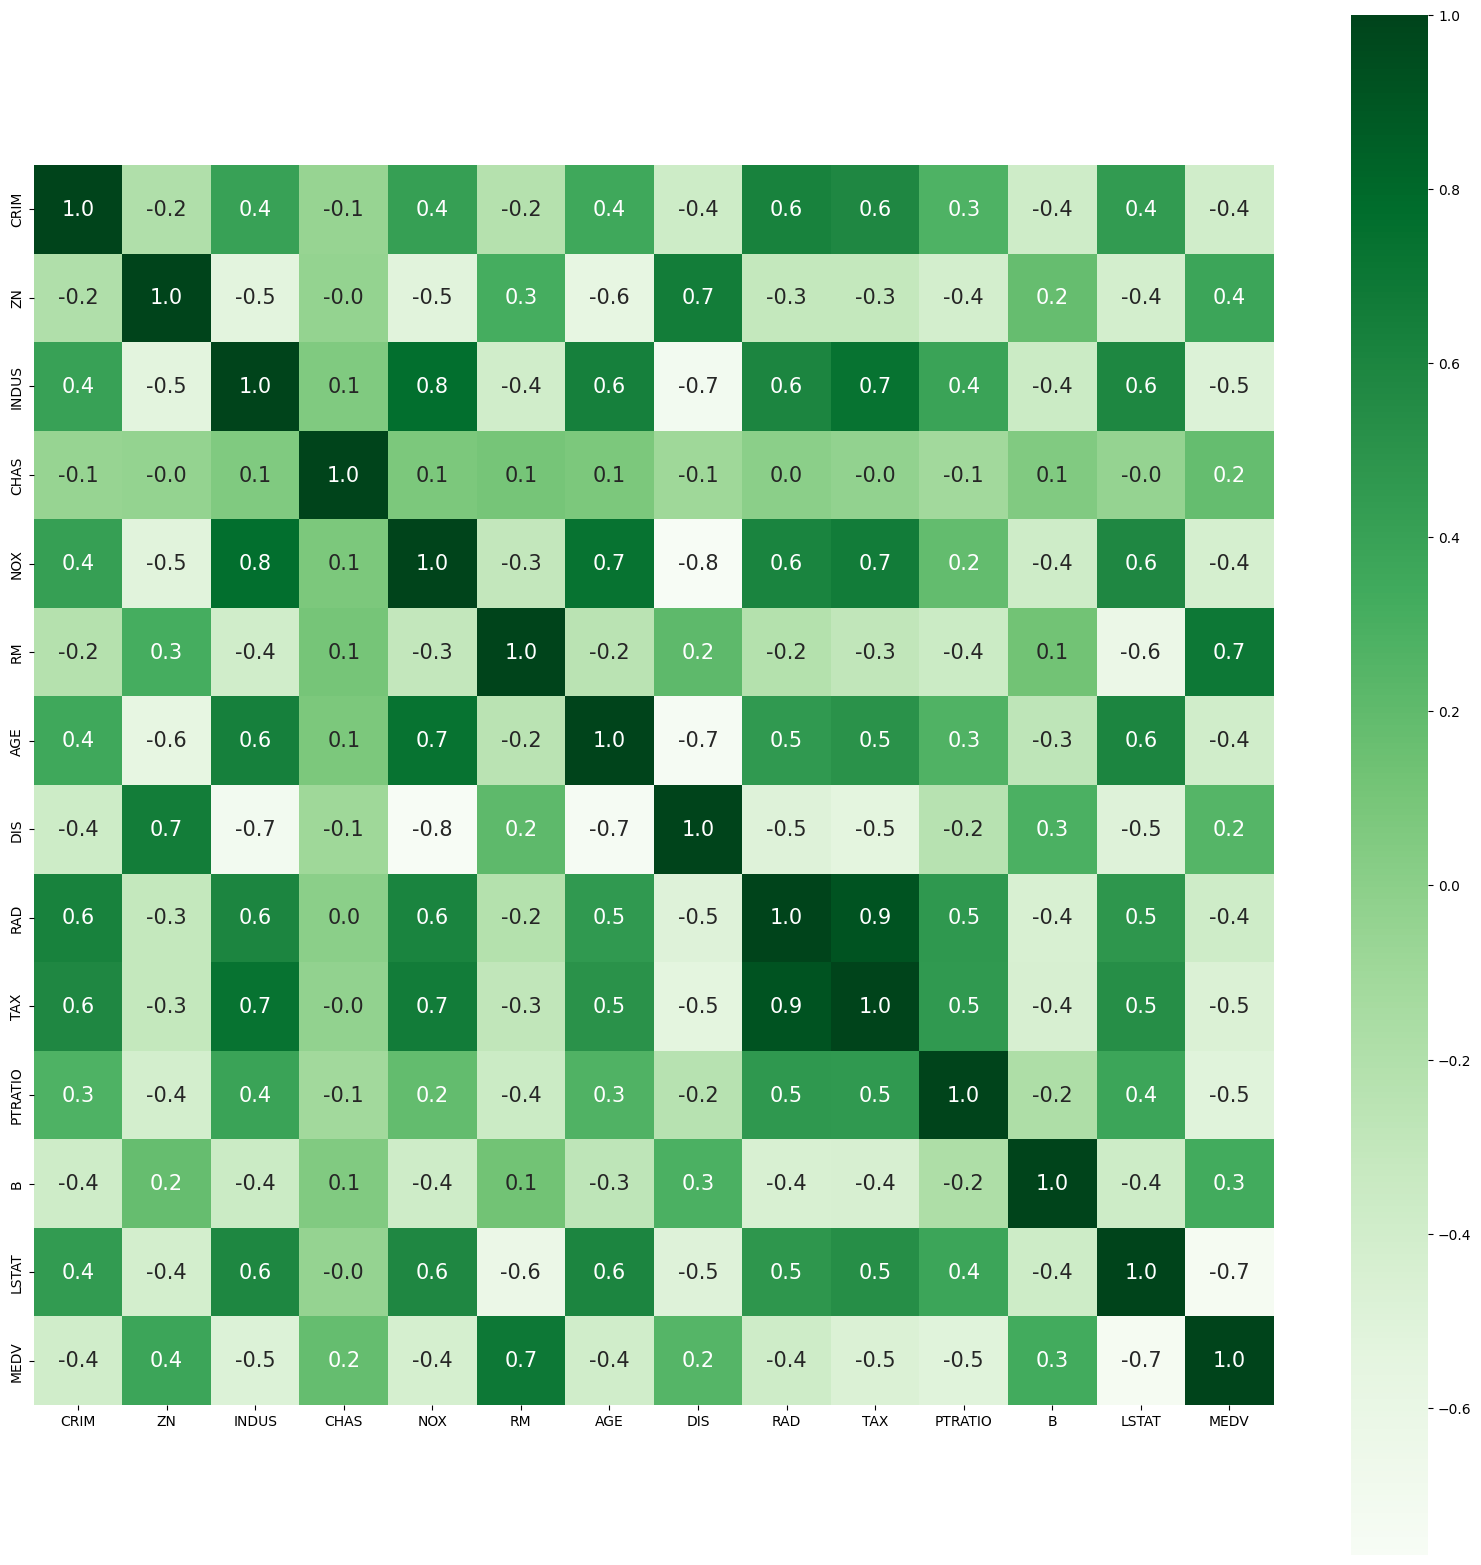

In [12]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [14]:
# Spliting target variable and independent variables
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [15]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [17]:
# Impute missing values using the mean
!pip install sklearn
import pandas as pd
from sklearn.impute import SimpleImputer

# Create an imputer object with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the test data using the fitted imputer
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Now you can continue with your model training:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train) # This should now work without error

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


LinearRegression()

In [18]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
# Value of y intercept
lm.intercept_

34.32092105207853

In [20]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.117959
1,ZN,0.04934
2,INDUS,-0.075847
3,CHAS,5.116896
4,NOX,-14.420327
5,RM,3.465798
6,AGE,-0.003357
7,DIS,-1.501067
8,RAD,0.284314
9,TAX,-0.012008


In [21]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [22]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7376020535400107
Adjusted R^2: 0.7275691908812465
MAE: 3.1350209036564674
MSE: 19.75091113180927
RMSE: 4.444199717813014


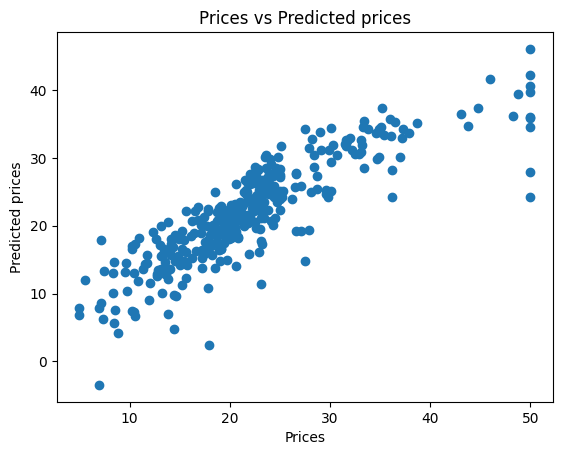

In [23]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


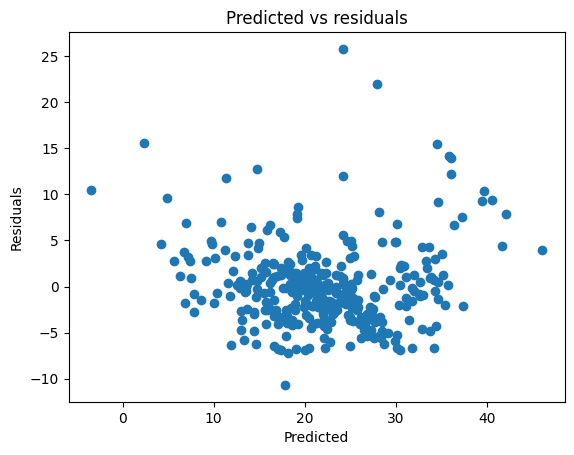

In [24]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

<ipython-input-25-c62ec83682b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


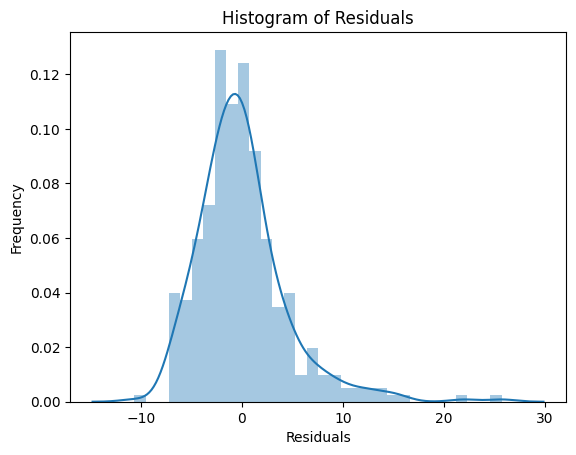

In [25]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [26]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [28]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7016778154139871
Adjusted R^2: 0.6735750009240004
MAE: 3.919141322309187
MSE: 31.150824077752652
RMSE: 5.581292330433217


In [30]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [32]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9769146754611031
Adjusted R^2: 0.9760320012875571
MAE: 0.8709604519774022
MSE: 1.7376515310734477
RMSE: 1.3182001104056424


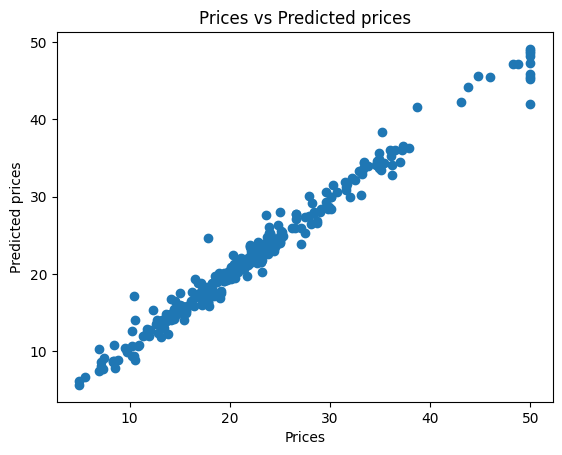

In [33]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

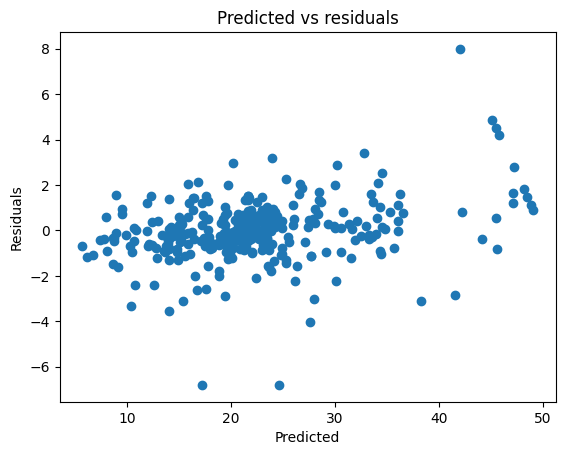

In [34]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [35]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [36]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8183675719114362
Adjusted R^2: 0.8012572707146874
MAE: 2.6146250000000006
MSE: 18.96607126973684
RMSE: 4.355005312251277


In [37]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [39]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999979834208822
Adjusted R^2: 0.9999979063163865
MAE: 0.00876322708560927
MSE: 0.00015178958327969572
RMSE: 0.012320291525759272


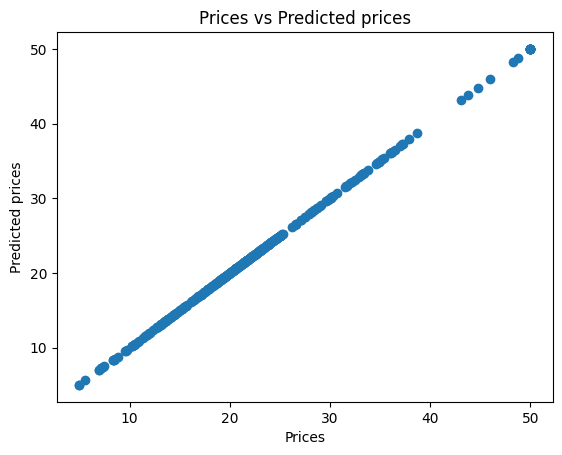

In [40]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


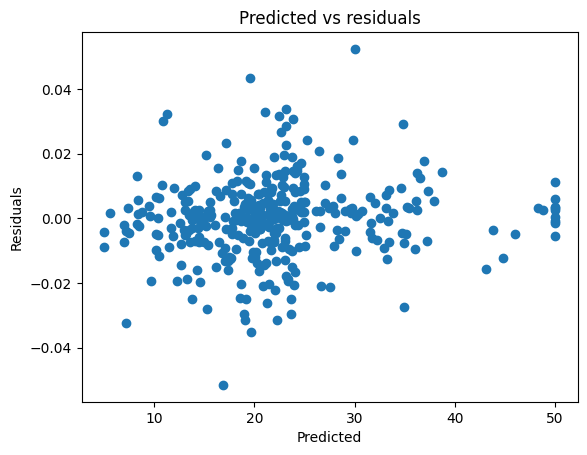

In [41]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


In [42]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [43]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8553115648563607
Adjusted R^2: 0.8416814948790614
MAE: 2.525740664883664
MSE: 15.10837685604744
RMSE: 3.8869495566636107


In [44]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [46]:
# Train the model using the training sets
reg.fit(X_train, y_train)

SVR()

In [47]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [48]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.635718748930248
Adjusted R^2: 0.6217903481540517
MAE: 2.9969885912265752
MSE: 27.41975199855483
RMSE: 5.236387304101448


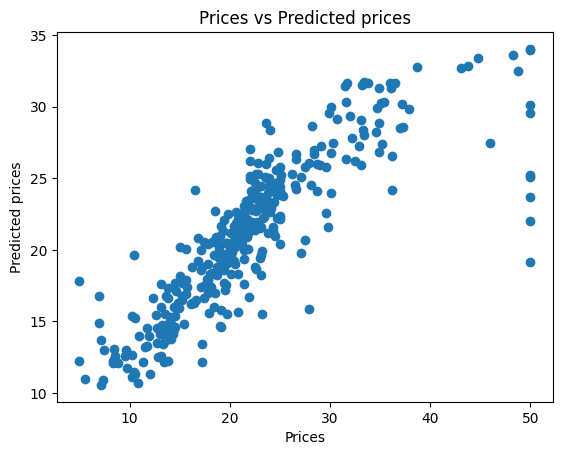

In [49]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

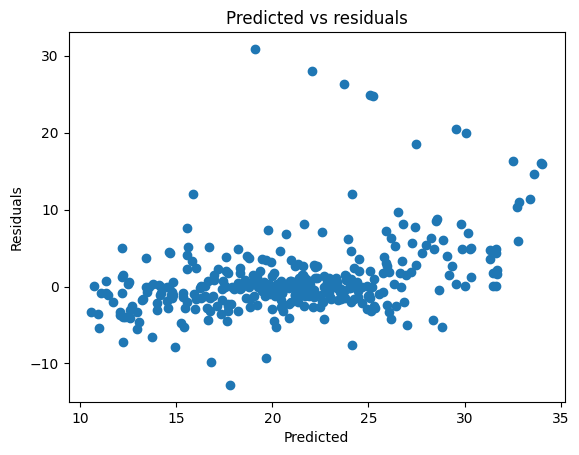

In [50]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [51]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [52]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5856885019020227
Adjusted R^2: 0.5466591578783002
MAE: 3.834943628411969
MSE: 43.262436578594816
RMSE: 6.577418686581752


In [53]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,85.531156
1,Random Forest,81.836757
0,Linear Regression,70.167782
3,Support Vector Machines,58.568850


from matplotlib import pyplot as plt
_df_0['R-squared Score'].plot(kind='hist', bins=20, title='R-squared Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['R-squared Score'].plot(kind='line', figsize=(8, 4), title='R-squared Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='R-squared Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)